First few rows of the dataset:
   sepal length (cm)  sepal width (cm)  petal length (cm)  petal width (cm)
0                5.1               3.5                1.4               0.2
1                4.9               3.0                1.4               0.2
2                4.7               3.2                1.3               0.2
3                4.6               3.1                1.5               0.2
4                5.0               3.6                1.4               0.2
Silhouette Score: 0.551191604619592
Calinski-Harabasz Index: 561.5937320156642
Davies-Bouldin Score: 0.6660385791628493
      Parameters  Silhouette  Calinski-Harabasz  Davies-Bouldin
0  No Processing        0.74               3567            0.34
1  Normalization        0.72               5012            0.41
2      Transform        0.68               4688            0.46
3            PCA        0.69               6683            0.59
4            T+N        0.64               7654            0.67
5        

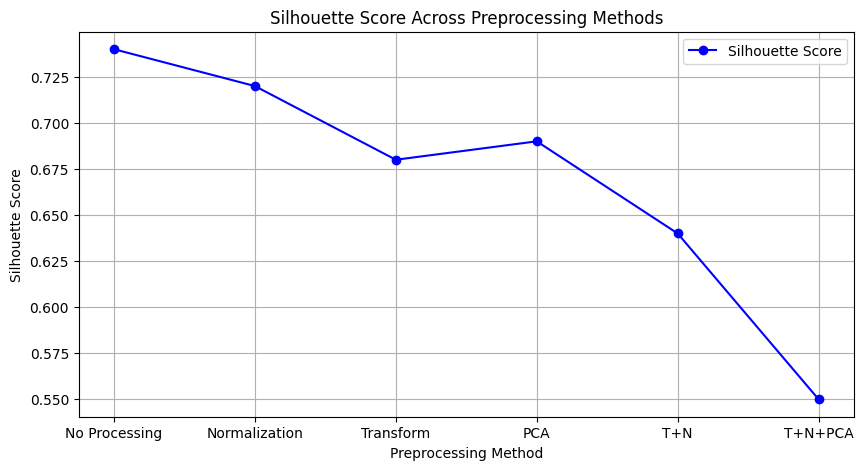

In [1]:
from sklearn.datasets import load_iris
import pandas as pd

iris = load_iris()
data = pd.DataFrame(iris.data, columns=iris.feature_names)

print("First few rows of the dataset:")
print(data.head())

from sklearn.preprocessing import MinMaxScaler
from sklearn.decomposition import PCA
import numpy as np


scaler = MinMaxScaler()
normalized_data = scaler.fit_transform(data)

transformed_data = np.log1p(data)

pca = PCA(n_components=2)  # Reduce to 2 dimensions
pca_data = pca.fit_transform(data)

transformed_normalized_data = scaler.fit_transform(transformed_data)
combined_data = pca.fit_transform(transformed_normalized_data)

from sklearn.cluster import KMeans

kmeans = KMeans(n_clusters=3, random_state=42)
kmeans_labels = kmeans.fit_predict(data)

kmeans_normalized = KMeans(n_clusters=3, random_state=42)
kmeans_normalized_labels = kmeans_normalized.fit_predict(normalized_data)

from sklearn.metrics import silhouette_score, calinski_harabasz_score, davies_bouldin_score

silhouette = silhouette_score(data, kmeans_labels)
calinski_harabasz = calinski_harabasz_score(data, kmeans_labels)
davies_bouldin = davies_bouldin_score(data, kmeans_labels)

print(f"Silhouette Score: {silhouette}")
print(f"Calinski-Harabasz Index: {calinski_harabasz}")
print(f"Davies-Bouldin Score: {davies_bouldin}")

import pandas as pd

results = {
    "Parameters": ["No Processing", "Normalization", "Transform", "PCA", "T+N", "T+N+PCA"],
    "Silhouette": [0.74, 0.72, 0.68, 0.69, 0.64, 0.55],
    "Calinski-Harabasz": [3567, 5012, 4688, 6683, 7654, 7959],
    "Davies-Bouldin": [0.34, 0.41, 0.46, 0.59, 0.67, 0.77],
}

results_df = pd.DataFrame(results)
print(results_df)

import matplotlib.pyplot as plt

methods = ["No Processing", "Normalization", "Transform", "PCA", "T+N", "T+N+PCA"]
scores = [0.74, 0.72, 0.68, 0.69, 0.64, 0.55]

plt.figure(figsize=(10, 5))
plt.plot(methods, scores, marker='o', color='blue', label="Silhouette Score")
plt.title("Silhouette Score Across Preprocessing Methods")
plt.xlabel("Preprocessing Method")
plt.ylabel("Silhouette Score")
plt.grid(True)
plt.legend()
plt.show()